# Team In The Cloud Final Project


Members: Anchita Bora and Nicole Carter


#### Laplace Mechanism (As stated from the Noisy Max Algorithm)
Introduced earlier, Laplace Mechanism adds noise to achieve differential privacy. It does so by using the sensitivity of the function and epsilon for the amount of _noise_ added. In other words, the amount of required noise depends on the sensitivity of the query in question.  

According to the papers gathered, the mathematical definition of Laplace Mechanism is the following:

$$
F(x) = f(x) + Lap(s / (\epsilon))
$$


In [3]:
# sense = sensitivity 
# eps = epsilon aka amount of noise
# q = the query f(x)

def laplace_mechanism(q, sense, eps):
    return q + np.random.laplace(loc=0, scale=sense / eps)

RNM satisfies differential privacy as it releases only the identity of the element with the largest noisy count and nothing more.

## Histogram Algorithm

The Histogram Algorithm is a general algorithm that is able to produce histograms to represent data. In regards to differential privacy, people can make it incorrectly by not adding enough noise to the data. The paper demonstrated both correct and incorrect ways to implement the algorithm from a differential privacy standpoint, and below are our findings.

In respect to differential privacy, the best case scenario for the Laplace mechanism is:
* Low sensitivity
* Large epsilon for large queries
* Less accurate results to guarantee privacy

**Process**
* Compare the actual values to the values obtained from the correct and incorrect algorithms.
    * When sensitivity = 1, epsilon
    * When epsilon = 0.2, 0.7, 1.5
* Using the same Laplace mechanism as mentioned before to calculate the relation to differential privacy.

In [6]:
actual = adult['Education'].value_counts()
actual

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

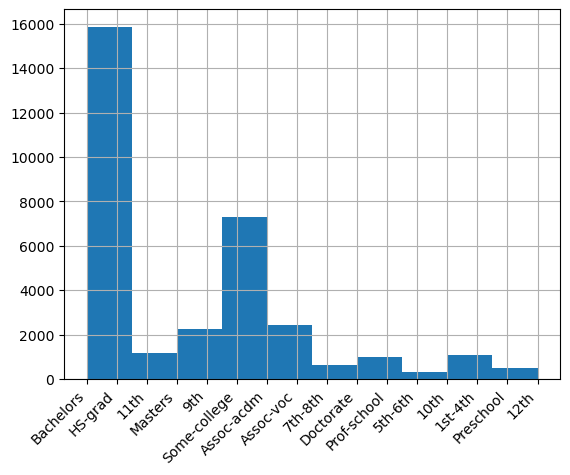

In [7]:
adult['Education'].hist()
plt.xticks(rotation = 45, ha = 'right')

**Laplace Noise** \
*Correct Histogram Algorithm* \
When dealing with Laplace noise, to produce the correct Histogram algorithm, we need to add `Lap(scale = 1/epsilon)` to the original data.

*Incorrect Histogram Algorithm* \
When making the Histogram algorithm, many people make the mistake of adding `Lap(scale = epsilon)` to the original data.

**Correct: Testing when Laplace noise `scale = 1/epsilon` and `epsilon = 0.2`**

In [8]:
eps = 0.2
formula = lambda x: x + np.random.laplace(loc=0, scale=1/eps)
hist11 = adult['Education'].value_counts().apply(formula)
hist11.to_frame().head(16)

,Education
HS-grad,10501.537777
Some-college,7283.188591
Bachelors,5356.926016
Masters,1720.497452
Assoc-voc,1386.474293
11th,1181.382220
Assoc-acdm,1064.360159
10th,934.347040
7th-8th,653.567945
Prof-school,577.071377


*Difference between the Correct Histogram vs. Actual Frequencies when `epsilon = 0.2`*

In [9]:
abs(hist11-actual)

HS-grad         0.537777
Some-college    7.811409
Bachelors       1.926016
Masters         2.502548
Assoc-voc       4.474293
11th            6.382220
Assoc-acdm      2.639841
10th            1.347040
7th-8th         7.567945
Prof-school     1.071377
9th             0.046747
12th            5.118652
Doctorate       9.196500
5th-6th         2.288121
1st-4th         5.251366
Preschool       0.149309
Name: Education, dtype: float64

**Incorrect: Testing when Laplace noise `scale = epsilon` and `epsilon = 0.2`**

In [10]:
eps = 0.2
formula = lambda x: x + np.random.laplace(loc=0, scale=eps)
hist12 = adult['Education'].value_counts().apply(formula)
hist12.to_frame().head(16)

,Education
HS-grad,10501.034975
Some-college,7291.094356
Bachelors,5355.484306
Masters,1723.029279
Assoc-voc,1381.986286
11th,1174.606712
Assoc-acdm,1066.883193
10th,932.999140
7th-8th,646.603127
Prof-school,575.701218


*Difference between the Incorrect Histogram vs. Actual Frequencies when `epsilon = 0.2`*

In [11]:
abs(hist12-actual)

HS-grad         0.034975
Some-college    0.094356
Bachelors       0.484306
Masters         0.029279
Assoc-voc       0.013714
11th            0.393288
Assoc-acdm      0.116807
10th            0.000860
7th-8th         0.603127
Prof-school     0.298782
9th             0.041194
12th            0.303111
Doctorate       0.124874
5th-6th         0.167146
1st-4th         0.087725
Preschool       0.079015
Name: Education, dtype: float64

**Correct: Testing when Laplace noise `scale = 1/epsilon` and `epsilon = 0.7`**

In [12]:
eps = 0.7
formula = lambda x: x + np.random.laplace(loc=0, scale=1/eps)
hist21 = adult['Education'].value_counts().apply(formula)
hist21.to_frame().head(16)

,Education
HS-grad,10500.763507
Some-college,7290.818419
Bachelors,5354.475235
Masters,1721.408512
Assoc-voc,1384.849002
11th,1172.388955
Assoc-acdm,1066.070395
10th,933.660226
7th-8th,641.825276
Prof-school,577.079390


*Difference between the Correct Histogram vs. Actual Frequencies when `epsilon = 0.7`*

In [13]:
abs(hist21-actual)

HS-grad         0.236493
Some-college    0.181581
Bachelors       0.524765
Masters         1.591488
Assoc-voc       2.849002
11th            2.611045
Assoc-acdm      0.929605
10th            0.660226
7th-8th         4.174724
Prof-school     1.079390
9th             0.079918
12th            2.422498
Doctorate       2.050529
5th-6th         0.359784
1st-4th         1.615829
Preschool       0.107929
Name: Education, dtype: float64

**Incorrect: Testing when Laplace noise `scale = epsilon` and `epsilon = 0.7`**

In [14]:
eps = 0.7
formula = lambda x: x + np.random.laplace(loc=0, scale=eps)
hist22 = adult['Education'].value_counts().apply(formula)
hist22.to_frame().head(16)

,Education
HS-grad,10500.583014
Some-college,7290.836864
Bachelors,5355.431167
Masters,1722.938772
Assoc-voc,1382.707191
11th,1172.752576
Assoc-acdm,1066.805315
10th,933.746996
7th-8th,646.043961
Prof-school,572.844777


*Difference between the Incorrect Histogram vs. Actual Frequencies when `epsilon = 0.7`*

In [15]:
abs(hist22-actual)

HS-grad         0.416986
Some-college    0.163136
Bachelors       0.431167
Masters         0.061228
Assoc-voc       0.707191
11th            2.247424
Assoc-acdm      0.194685
10th            0.746996
7th-8th         0.043961
Prof-school     3.155223
9th             0.461255
12th            0.116478
Doctorate       0.575116
5th-6th         1.355135
1st-4th         0.204900
Preschool       0.039108
Name: Education, dtype: float64

**Correct: Testing when Laplace noise `scale = 1/epsilon` and `epsilon = 1.5`**

In [16]:
eps = 1.5
formula = lambda x: x + np.random.laplace(loc=0, scale=1/eps)
hist31 = adult['Education'].value_counts().apply(formula)
hist31.to_frame().head(16)

,Education
HS-grad,10501.142407
Some-college,7291.308274
Bachelors,5355.452493
Masters,1723.784809
Assoc-voc,1382.834315
11th,1174.243497
Assoc-acdm,1066.769964
10th,932.880221
7th-8th,647.249518
Prof-school,575.917728


*Difference between the Correct Histogram vs. Actual Frequencies when `epsilon = 1.5`*

In [17]:
abs(hist31-actual)

HS-grad         0.142407
Some-college    0.308274
Bachelors       0.452493
Masters         0.784809
Assoc-voc       0.834315
11th            0.756503
Assoc-acdm      0.230036
10th            0.119779
7th-8th         1.249518
Prof-school     0.082272
9th             0.193077
12th            0.089806
Doctorate       0.174738
5th-6th         0.964121
1st-4th         0.951397
Preschool       0.467524
Name: Education, dtype: float64

**Incorrect: Testing when Laplace noise `scale = epsilon` and `epsilon = 1.5`**

In [18]:
eps = 1.5
formula = lambda x: x + np.random.laplace(loc=0, scale=eps)
hist32 = adult['Education'].value_counts().apply(formula)
hist32.to_frame().head(16)

,Education
HS-grad,10500.580213
Some-college,7291.499993
Bachelors,5354.470374
Masters,1719.635836
Assoc-voc,1385.282540
11th,1174.750841
Assoc-acdm,1065.430954
10th,928.580950
7th-8th,644.259440
Prof-school,578.709551


*Difference between the Incorrect Histogram vs. Actual Frequencies when `epsilon = 1.5`*

In [19]:
abs(hist32-actual)

HS-grad         0.419787
Some-college    0.499993
Bachelors       0.529626
Masters         3.364164
Assoc-voc       3.282540
11th            0.249159
Assoc-acdm      1.569046
10th            4.419050
7th-8th         1.740560
Prof-school     2.709551
9th             0.245787
12th            0.561635
Doctorate       1.336244
5th-6th         1.507529
1st-4th         0.805451
Preschool       1.293922
Name: Education, dtype: float64

**Conclusions about the Histogram algorithm using the Laplace mechanism:**

When the epsilon value < sensitivity, the incorrect algorithm looks like it is more accurate than the correct algorithm, but once the epsilon value > sensitivity, we can see that the difference between the correct algorithm and the initial data value count is the smallest for a majority of the categories.

Based on our findings, we can see that the counted values for the `Education` category has the best privacy reliability when we use the Laplace mechanism with the correct scaling `scale = 1/epsilon` and an `epsilon` value of `1.5`.

* When the epsilon value is larger than the sensitivity, it allows the correct algorithm to have more accurate dimensions than the incorrect algorithm.